In [1]:
import mdtraj as md
import os, sys, importlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def source_module_attr(module_file:str, attr_name:str, local_attr_name:str = None):
    
    """to add a module from a user defined python script into the local name space"""
    
    #
    if local_attr_name is None:
        local_attr_name = attr_name
    
    if len(module_file.split("/")) == 1 or module_file.split("/")[-2] == ".":
        module_dir = os.getcwd()
    else:
        module_dir = "/".join(module_file.split("/")[:-1])

    sys.path.insert(0, module_dir)
    
    module = importlib.import_module(module_file.split("/")[-1][:-3])
    
    g = globals()
    g[local_attr_name] = getattr(module, attr_name)
    
    pass

#source writhe scripts
source_module_attr("./writhe_graph.py", "WritheGraph")
source_module_attr("./writhe.py", "Writhe")
source_module_attr("./lightning_graph.py", "GraphDataSet")


 # Load MDTraj Trajectory Object

In [2]:
dcd = "/home/t/writhe/actr/ACTR-a99SBdisp-Traj.dcd"
pdb = "/home/t/writhe/actr/ACTR.pdb"
# table,bonds = md.load(pdb).topology.to_dataframe()
# table.sort_values("resSeq", inplace = True, ignore_index = True)
# top = md.Topology.from_dataframe(table, bonds)
trj = md.load(dcd, top=pdb).center_coordinates()
trj = trj.atom_slice(trj.topology.select("resid 0 to 70"))
residues=[str(trj.topology.residue(i)) for i in range(trj.n_residues)]

 # Compute Writhe, Generate Matrices For Visualization and Store Results In Writhe Class Instance For Plotting Later

In [3]:
#get CA coords
xyz = trj.atom_slice(trj.topology.select("name CA")).xyz
#instantiate writhe class
writhe = Writhe(xyz)
#compute writhe at segment length : 4 (uses parallelization over the cpu cores)
writhe_data = writhe.compute_writhe(length = 4,
                                    matrix = True,
                                    store_results = True,
                                    return_segments=False,
                                    adj_matrix=False)

2023-08-23 23:07:24,889	INFO worker.py:1636 -- Started a local Ray instance.


 # Test Speed The Parallelized Computation

In [4]:
#test the speed of the calculation without storing and reshaping data
writhe.compute_writhe(length=4, speed_test=True)

Time elapsed : 2.3995110988616943 s


# Use Writhe Class Plotting Functions.

posx and posy should be finite values


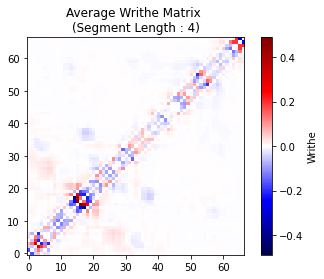

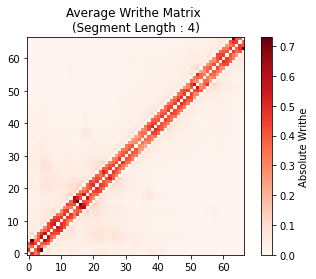

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


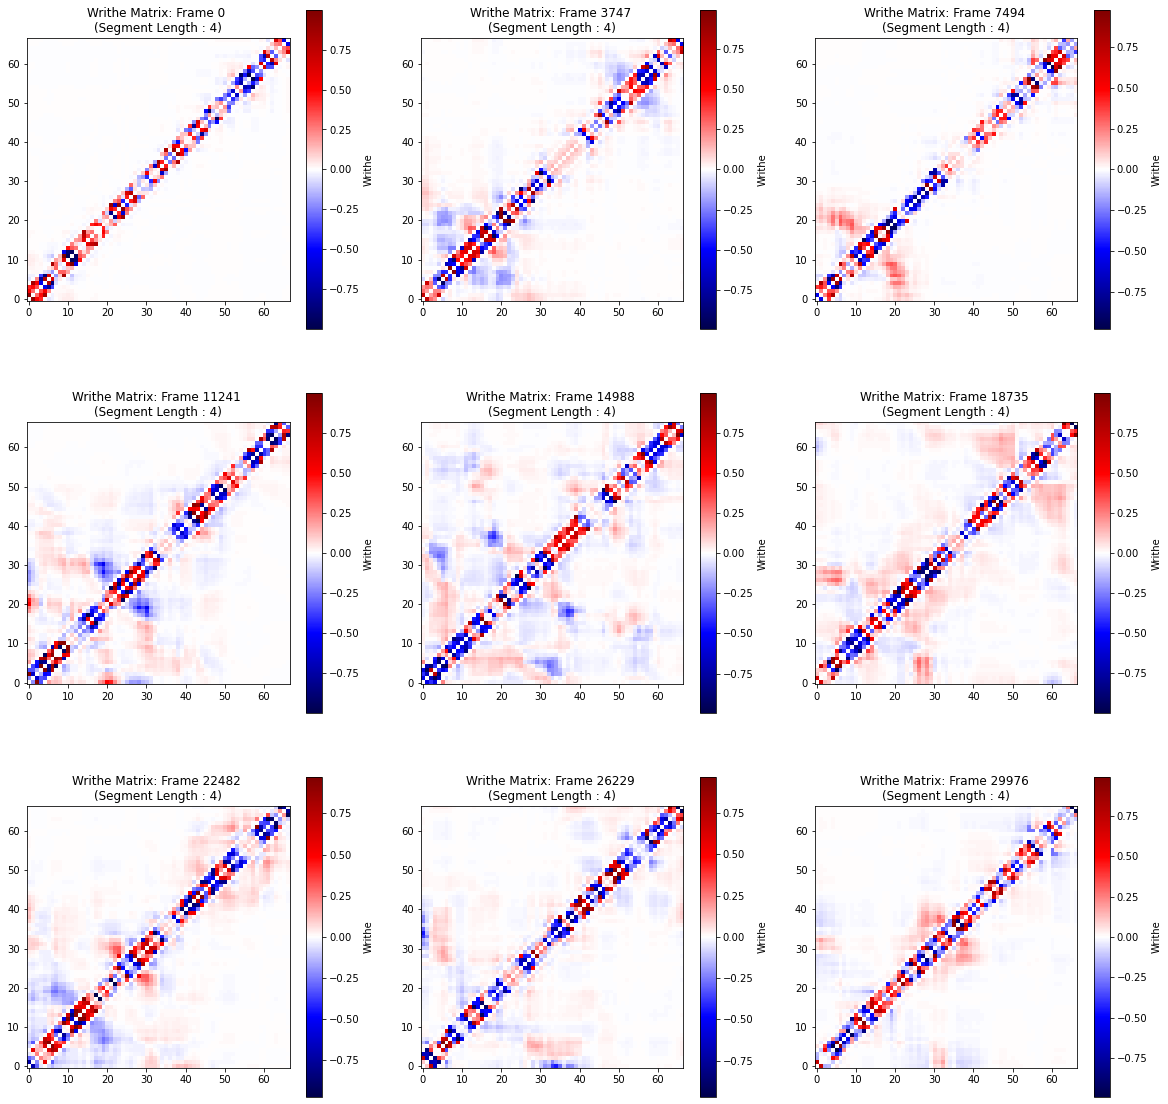

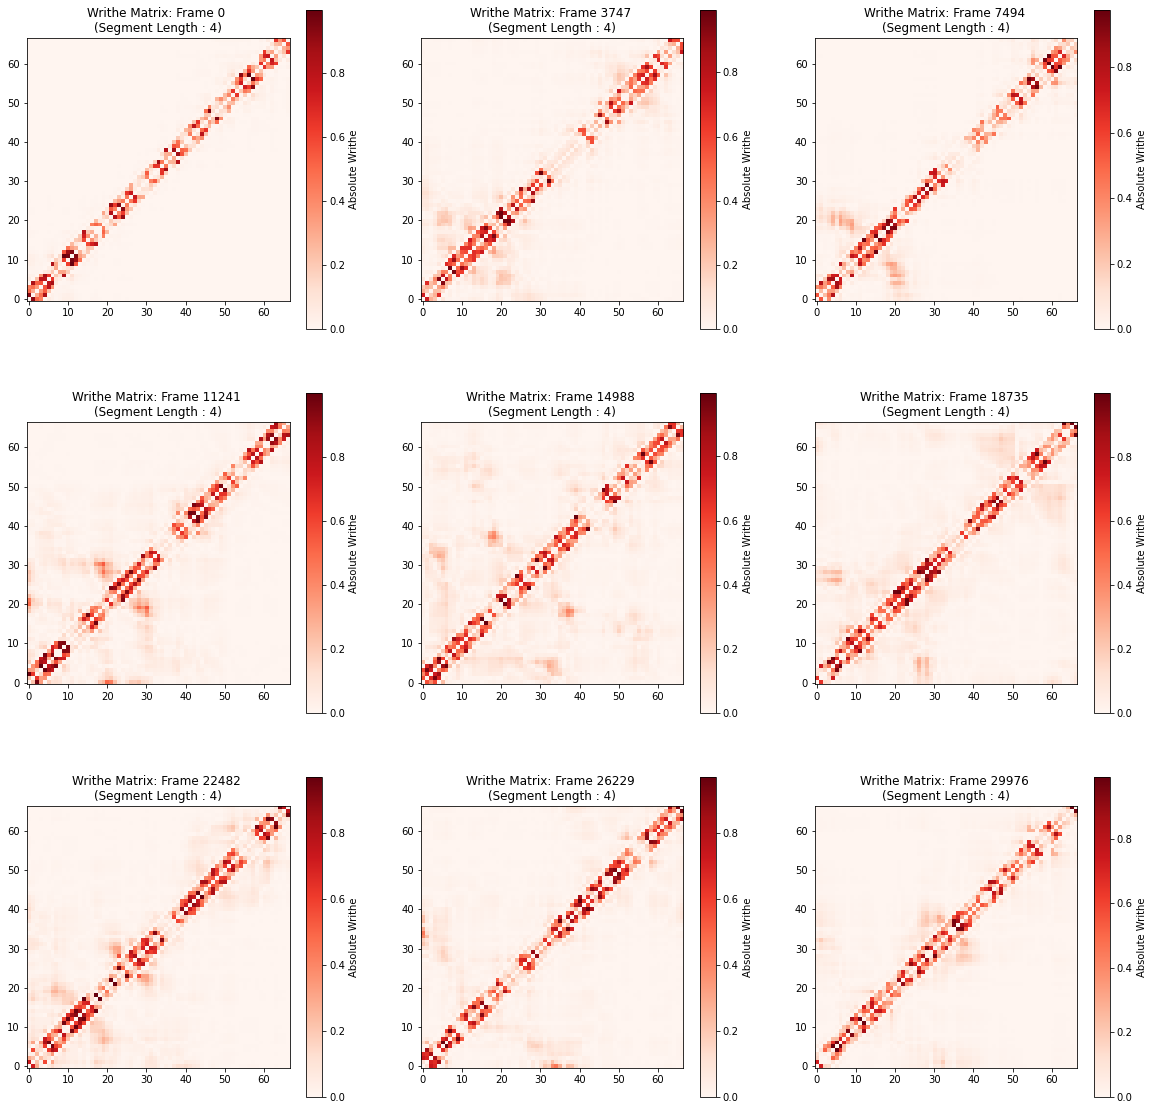

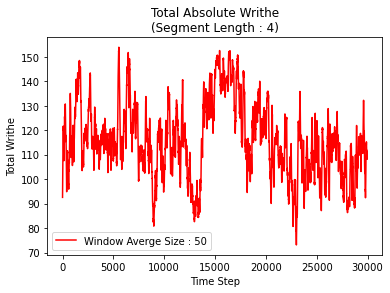

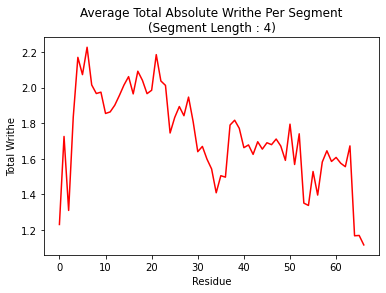

In [5]:
#plot the average 
writhe.plot_writhe_matrix()
#plot the absolute value average
writhe.plot_writhe_matrix(absolute=True)
#plot the writhe matrix at different timesteps
fig,axes=plt.subplots(3,3, figsize=(20,20))
fig_abs,axes_abs=plt.subplots(3,3, figsize=(20,20))
for ax, ax_abs, index in zip(axes.flat, axes_abs.flat, np.linspace(0,trj.n_frames-1,9).astype(int)):
    writhe.plot_writhe_matrix(index=index, ax=ax)
    writhe.plot_writhe_matrix(index=index, ax=ax_abs, absolute=True)
    
    
#plot the total absolute writhe in a time series with a windowed average
writhe.plot_writhe_total(window=50)
#plot the average absolute writhe per segment
writhe.plot_writhe_per_segment()


# Use Same Instance To Compute and Plot Writhe Data At Different Segment Lengths

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


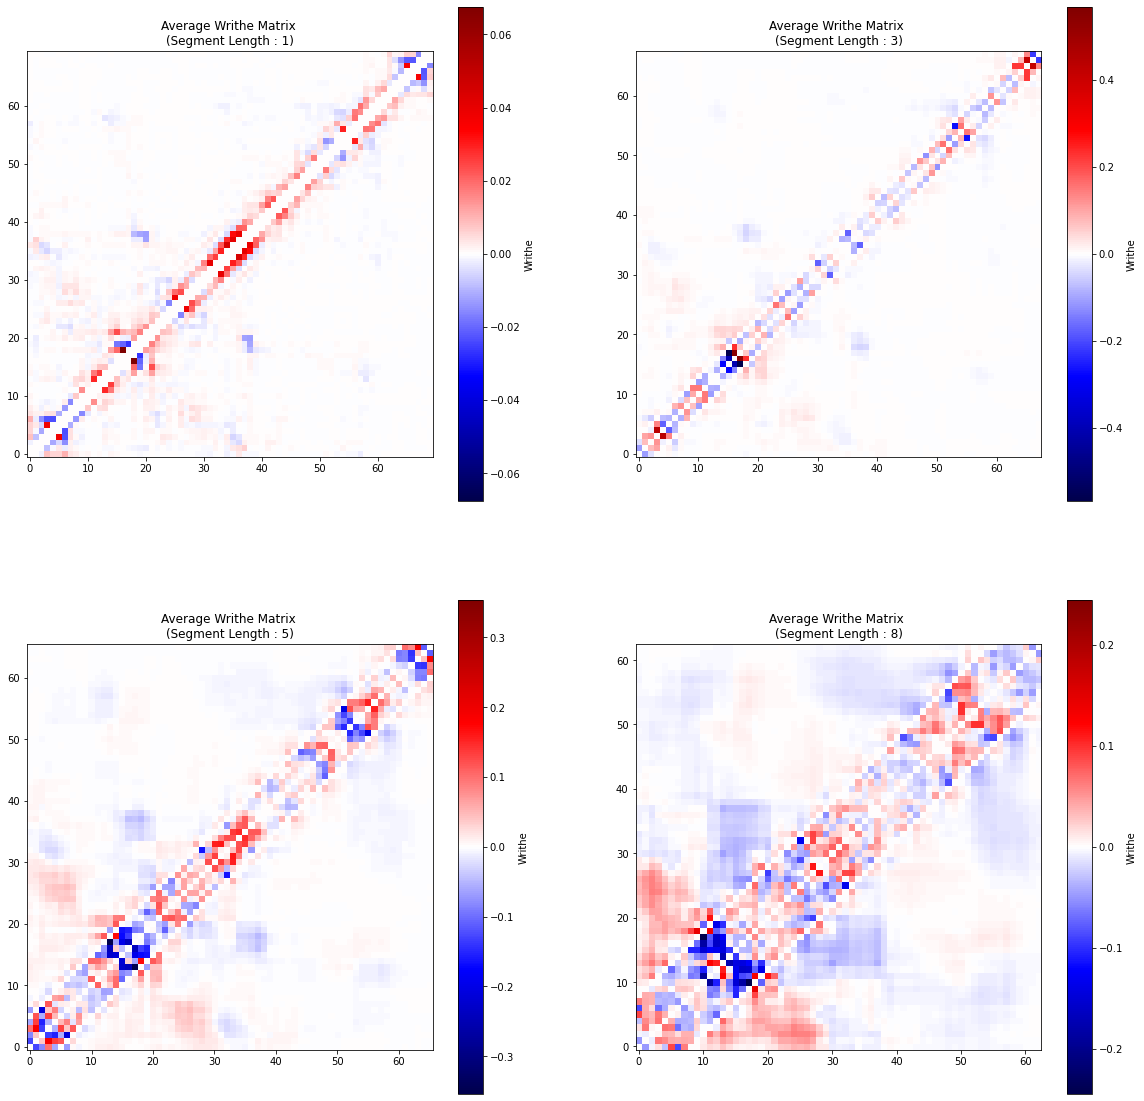

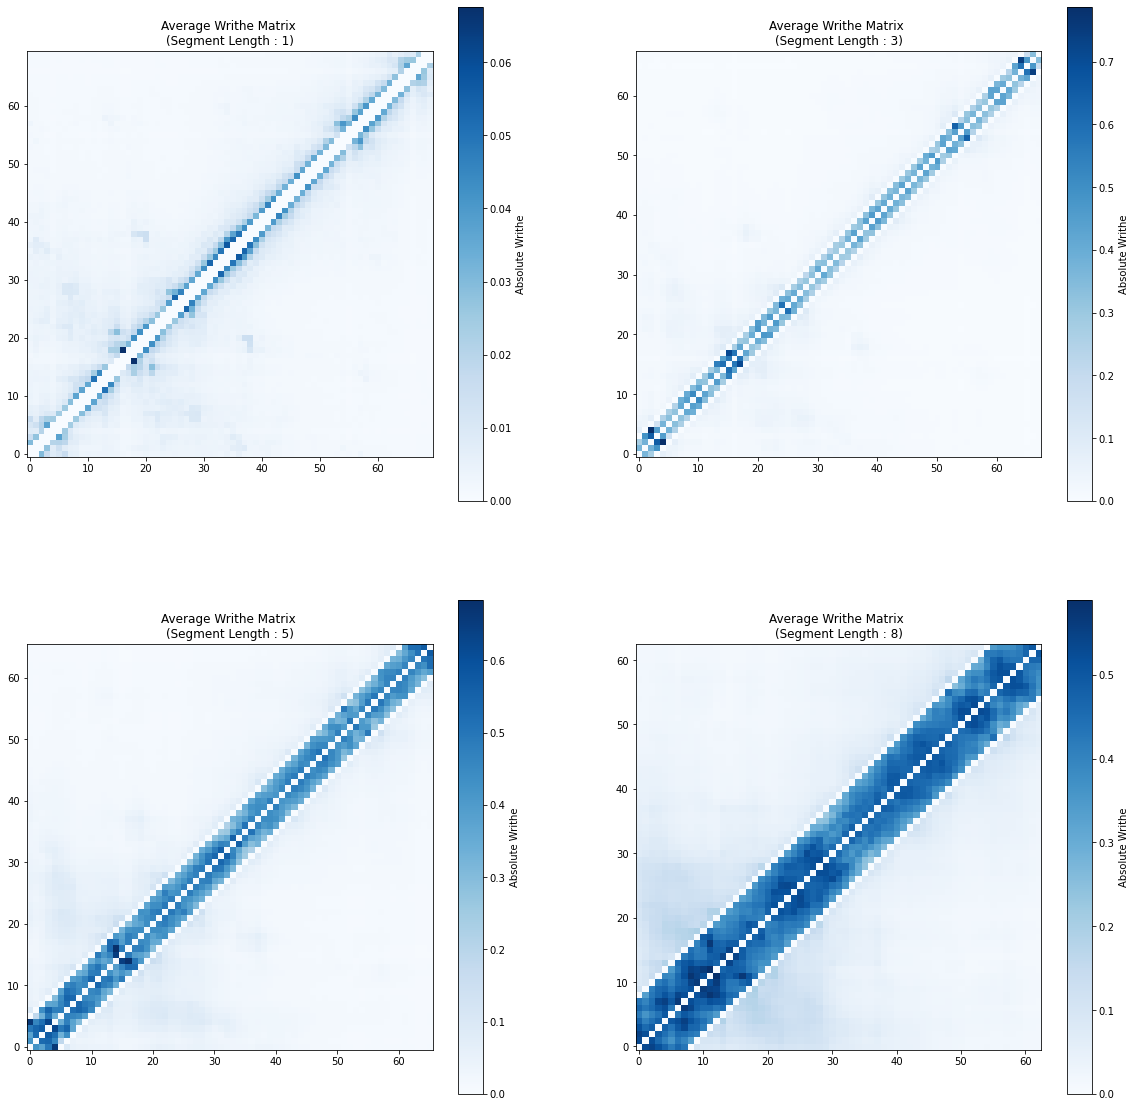

In [6]:
#compute and plot the writhe for different segment lengths
fig, axes = plt.subplots(2,2, figsize=(20,20))
fig_abs, axes_abs = plt.subplots(2,2, figsize=(20,20))
for ax, ax_abs,length in zip(axes.flat, axes_abs.flat, [1,3,5,8]):
    writhe_data_ = writhe.compute_writhe(length = length,
                                         matrix = True,
                                         store_results = True,
                                        )
    writhe.plot_writhe_matrix(ax=ax)
    writhe.plot_writhe_matrix(ax=ax_abs,absolute=True)

 # Make Graph Representations For All Frames of The Trajectory

In [7]:
#make instance```````a
graph = WritheGraph(trj)

#add edge features
graph.add_dihedrals() #0,1
graph.add_angles() #2,3
graph.add_intra_distances() #4
graph.add_writhe(segment_length = 1) #5
graph.add_writhe(segment_length = 3) #6
graph.add_writhe(segment_length = 5) #7

#add node_features
#graph.add_ligand_distances() #0
graph.add_dssp() #1
graph.add_rsa() #2

#set up
graph.make_edge_dict()

In [8]:
graphs = [graph.get_graph(i) for i in range(graph.nf)]
root="./actr/graphs"
os.mkdir(root)
graph_dataset = GraphDataSet(root=root, name="graph", data_list=graphs)

Processing...
Done!
